# Grapevine_Leaves_Image_Dataset
### Mina Ilkhani
### 610398191

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import some libraries to handel images 

In [58]:
import os
import cv2 as cv       # dimensions
from glob import glob

two other usefull library

In [59]:
import numpy as np
import pandas as pd

# open data set

data set path (my google drive)

In [60]:
data_set_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset'

classes

In [61]:
files_path = glob('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/*')
files_path

['/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu',
 '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit',
 '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak',
 '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli',
 '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris']

there are 5 class in 5 folder

In [62]:
label_names = os.listdir(data_set_path)
label_names

['Buzgulu', 'Dimnit', 'Ak', 'Nazli', 'Ala_Idris']

**create df(test and train)**

features : {path,label}

In [63]:
image_path = []
image_label = []

for i in range(len(label_names)):
  for img in glob((files_path[i])+('/*')):
    image_path.append(img)
    image_label.append(label_names[i])

df = pd.DataFrame({'image_path':pd.Series(image_path).values, 'label':pd.Series(image_label).values})

df.head()

,image_path,label
0,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
1,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
2,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
3,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
4,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu


### shuffle:

In [64]:
df = df.sample(frac=1)
df.head()

,image_path,label
186,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Dimnit
428,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris
497,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris
297,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
36,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu


# now take a look at data set:

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 186 to 475
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  500 non-null    object
 1   label       500 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB


In [66]:
df['label'].value_counts()

Dimnit       100
Ala_Idris    100
Ak           100
Buzgulu      100
Nazli        100
Name: label, dtype: int64

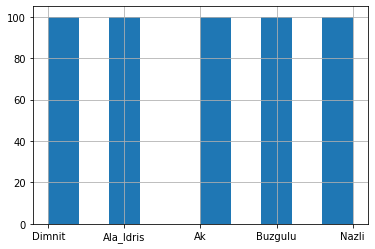

In [67]:
df[df.columns[-1]].hist()

In [135]:
from collections import Counter
size = []
for path in image_path:
  im = cv.imread(path) 
  size.append(im.shape)
print('width, height, channel:', *Counter(size))

width, height, channel: (511, 511, 3)


All images are the same size

In [69]:
image_size = tuple((511, 511, 3))

# plot func

import libraries for plotting

In [70]:
import matplotlib.pylab as plt
import random
from PIL import Image

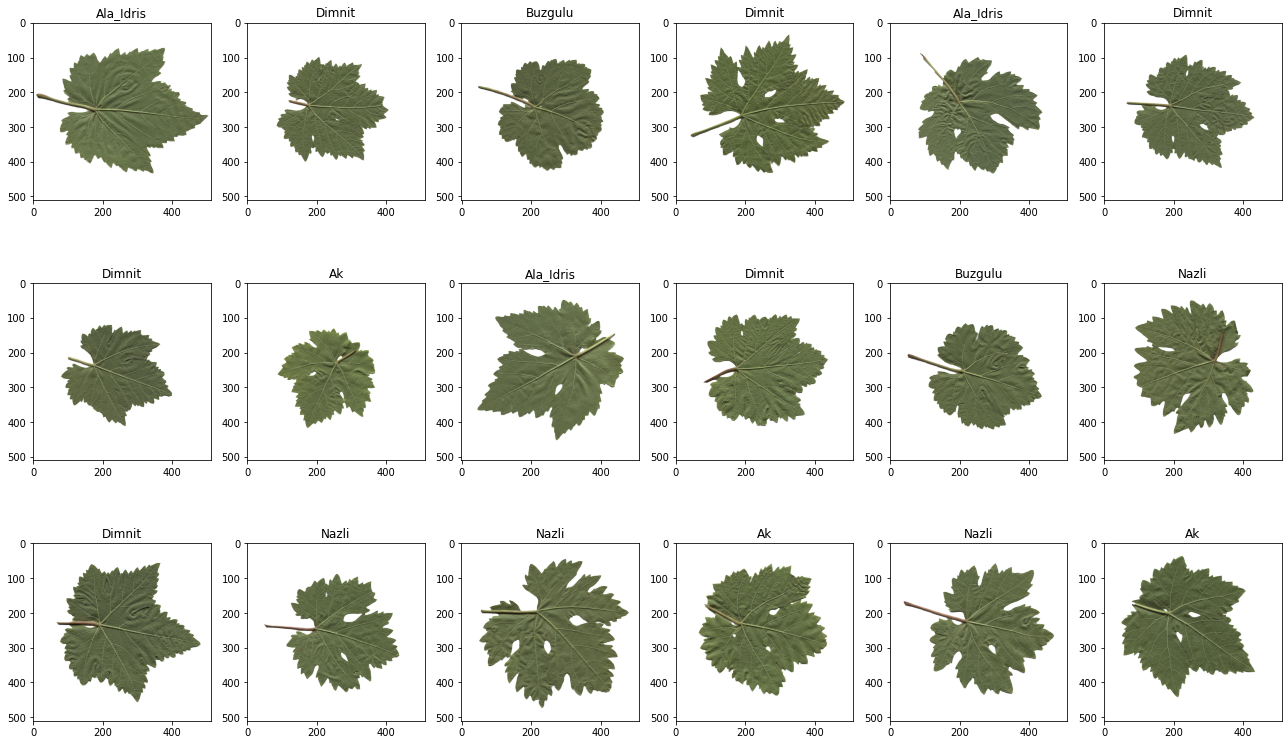

In [136]:
plt.figure(figsize = (18,11))
for i in range(18):
    plt.subplot(3,6,i+1)
    j = random.randint(0,500)
    img = Image.open(df['image_path'][j])
    plt.imshow(img)
    plt.title(df['label'][j])
plt.tight_layout()
plt.show()

In [72]:
def plot_gen(gen ):
    images,labels=next(gen)
    plt.figure(figsize=(25, 10))
    for i in range(0,15):        
        plt.subplot(3, 5, i + 1)
        image=images[i]/255        
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=label_names[index]
        plt.title(class_name,fontsize=12)
        plt.axis('off')
    plt.show()

In [73]:
def loss_acc_plot(history, num_of_epoch):
  Epochs=[]
  for i in range (num_of_epoch):
      Epochs.append(i+1)   
  fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(11,5))
  axes[0].plot(Epochs,history.history['loss'],        label = 'Training loss')
  axes[1].plot(Epochs,history.history['accuracy'],    label = 'Training Accuracy')
  axes[0].plot(Epochs,history.history['val_loss'],    label = 'Validation loss' )
  axes[1].plot(Epochs,history.history['val_accuracy'],label = 'Validation Accuracy')
  axes[0].set_xlabel('epochs')
  axes[1].set_xlabel('epochs')
  axes[0].set_ylabel('loss')
  axes[1].set_ylabel('acc')
  axes[0].legend()
  axes[1].legend()
  plt.show()

# split test and train and validation:

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(image_path, image_label, test_size=0.20)

In [76]:
print('*train:')
print('count       ',len(y_train))
print(pd.DataFrame(y_train).value_counts())
print()
print('test:')
print('count       ',len(y_test))
print(pd.DataFrame(y_test).value_counts())

*train:
count        400
Ak           86
Buzgulu      84
Ala_Idris    83
Dimnit       75
Nazli        72
dtype: int64

test:
count        100
Nazli        28
Dimnit       25
Ala_Idris    17
Buzgulu      16
Ak           14
dtype: int64


In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

In [78]:
print('*train:')
print('count       ',len(y_train))
print(pd.DataFrame(y_train).value_counts())
print()
print('val:')
print('count       ',len(y_val))
print(pd.DataFrame(y_val).value_counts())

*train:
count        320
Ala_Idris    68
Buzgulu      68
Ak           63
Dimnit       63
Nazli        58
dtype: int64

val:
count        80
Ak           23
Buzgulu      16
Ala_Idris    15
Nazli        14
Dimnit       12
dtype: int64


convert to data frame

In [79]:
test = pd.DataFrame(list(zip(X_test, y_test)),
               columns =['image_path', 'label'])
test.head()

,image_path,label
0,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Dimnit
1,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
2,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Nazli
3,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris
4,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Dimnit


In [80]:
train = pd.DataFrame(list(zip(X_train, y_train)),
               columns =['image_path', 'label'])
train.head()

,image_path,label
0,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Dimnit
1,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
2,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
3,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
4,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris


In [81]:
val = pd.DataFrame(list(zip(X_val, y_val)),
               columns =['image_path', 'label'])
val.head()

,image_path,label
0,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
1,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
2,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris
3,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Buzgulu
4,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ala_Idris


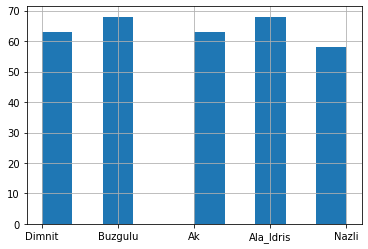

In [82]:
train[train.columns[-1]].hist()

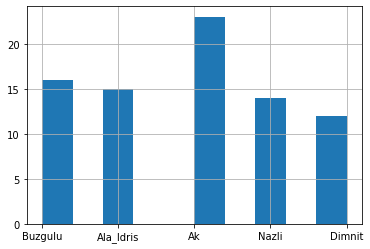

In [83]:
val[val.columns[-1]].hist()

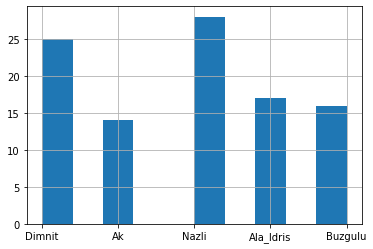

In [84]:
test[test.columns[-1]].hist()

# ‫‪data‬‬ ‫‪augmentation‬‬

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

I used horizontal_flip, rotation, width_shift, height_shift and zoom_range

 fill_mode ='nearest' :replaces the empty area with the nearest pixel values.
 
 Random Brightness: not good

In [86]:
gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=30, width_shift_range=.2,
                              height_shift_range=.2, zoom_range=.2, fill_mode = 'nearest')

In [87]:

train_gen= gen.flow_from_dataframe(
        train,  
        x_col='image_path',
        y_col='label',
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)


Found 320 validated image filenames belonging to 5 classes.


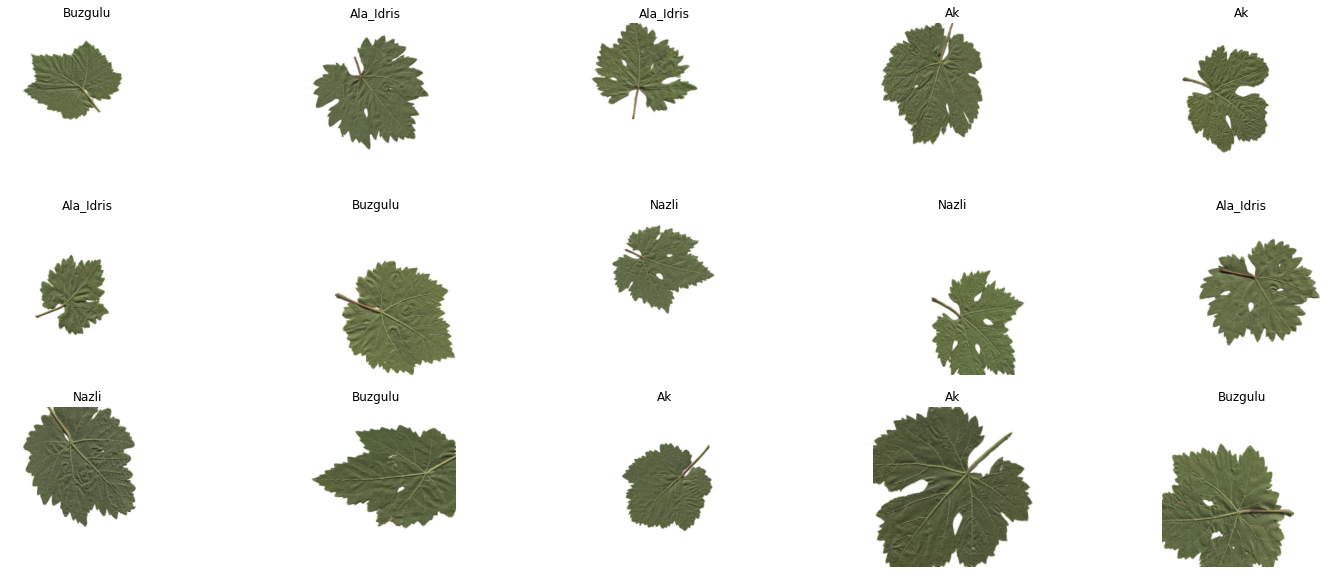

In [88]:
plot_gen(train_gen)

In [89]:
val_gen = gen.flow_from_dataframe(
        val,  
        x_col='image_path',
        y_col='label', 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

Found 80 validated image filenames belonging to 5 classes.


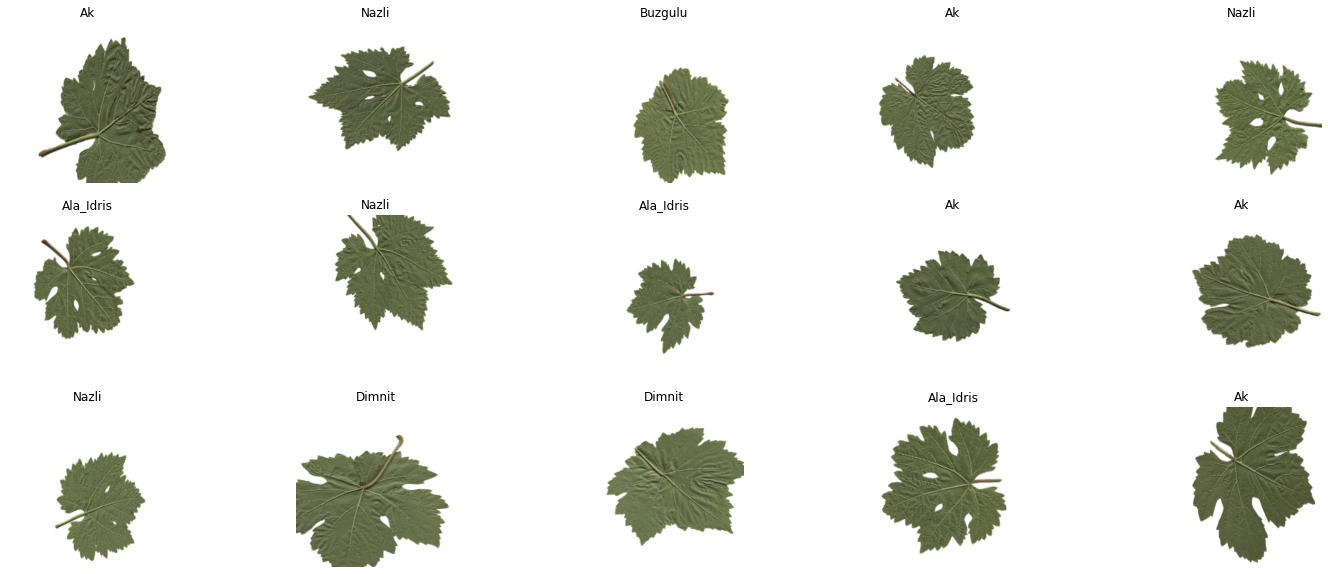

In [90]:
plot_gen(val_gen)

In [91]:
test_gen = gen.flow_from_dataframe(
        test, 
        x_col='image_path',
        y_col='label', 
        # batch_size=32,
        # class_mode="categorical",
        shuffle=False,
)

Found 100 validated image filenames belonging to 5 classes.


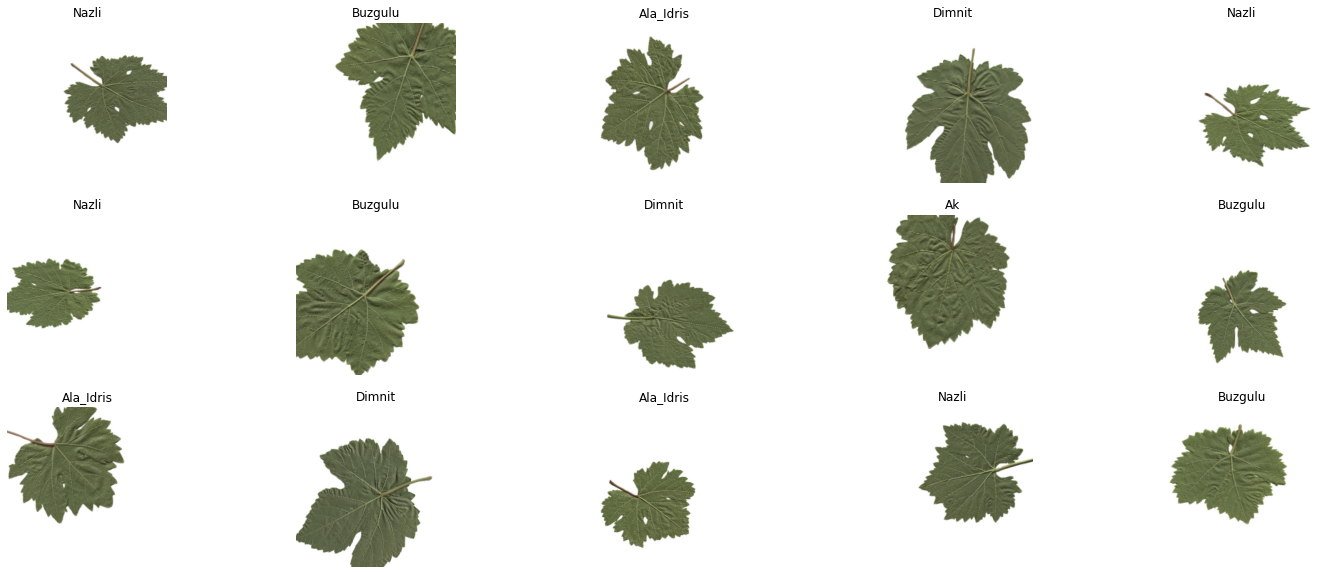

In [92]:
plot_gen(test_gen)

### ResNet50

In [93]:
from tensorflow.keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense,   Dropout, BatchNormalization
from keras import  models


In [94]:
resnet50 = ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')

for layer in resnet50.layers:
    layer.trainable = False  # better acc

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(5, activation='softmax')(x)

model_resnet50 = models.Model(inputs = resnet50.input, outputs = predictions)

In [95]:
import tensorflow as tf

cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
callbacks = [cb]

In [96]:
model_resnet50.compile(loss='categorical_crossentropy', 
                       optimizer="adam", metrics=['accuracy'])

In [97]:
history_resnet50 = model_resnet50.fit(
      train_gen,
      validation_data=val_gen,
      epochs=50,
      verbose=2,
      callbacks = callbacks)

Epoch 1/50
10/10 - 22s - loss: 1.7378 - accuracy: 0.2469 - val_loss: 1.4957 - val_accuracy: 0.2250 - 22s/epoch - 2s/step
Epoch 2/50
10/10 - 9s - loss: 1.2883 - accuracy: 0.4844 - val_loss: 1.2096 - val_accuracy: 0.6375 - 9s/epoch - 856ms/step
Epoch 3/50
10/10 - 9s - loss: 1.1746 - accuracy: 0.5562 - val_loss: 1.1790 - val_accuracy: 0.5750 - 9s/epoch - 854ms/step
Epoch 4/50
10/10 - 9s - loss: 1.0786 - accuracy: 0.5938 - val_loss: 1.1139 - val_accuracy: 0.5625 - 9s/epoch - 855ms/step
Epoch 5/50
10/10 - 9s - loss: 0.9922 - accuracy: 0.6281 - val_loss: 0.9951 - val_accuracy: 0.6875 - 9s/epoch - 853ms/step
Epoch 6/50
10/10 - 9s - loss: 0.8818 - accuracy: 0.7156 - val_loss: 0.9828 - val_accuracy: 0.6500 - 9s/epoch - 855ms/step
Epoch 7/50
10/10 - 9s - loss: 0.8405 - accuracy: 0.7031 - val_loss: 0.9112 - val_accuracy: 0.7125 - 9s/epoch - 861ms/step
Epoch 8/50
10/10 - 9s - loss: 0.8464 - accuracy: 0.6750 - val_loss: 0.8733 - val_accuracy: 0.7625 - 9s/epoch - 860ms/step
Epoch 9/50
10/10 - 8s - l

In [98]:
pred = model_resnet50.evaluate(test_gen)

4/4 [==============================] - 2s 442ms/step - loss: 0.3981 - accuracy: 0.8700


# 

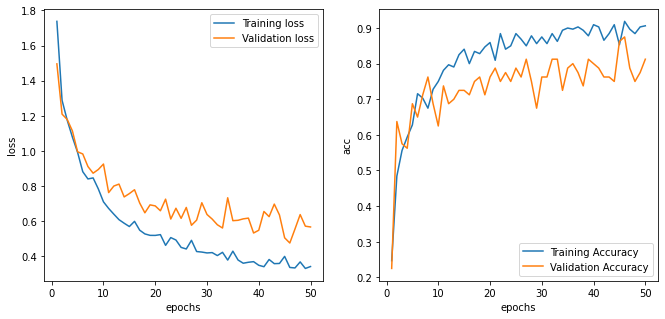

In [99]:
loss_acc_plot(history_resnet50, 50)

it seems to overfit in the last epoch

### EfficientNetB3

In [100]:
from keras import regularizers
from tensorflow.keras.optimizers import Adamax

In [101]:

model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=image_size, pooling='max') 
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)       
output=Dense(len(label_names), activation='softmax')(x)
model_EfficientNetB3=models.Model(inputs=base_model.input, outputs=output)
lr=.001

model_EfficientNetB3.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 


In [102]:
history=model_EfficientNetB3.fit(x=train_gen,  epochs=50, verbose=2, validation_data=val_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, callbacks = callbacks)

Epoch 1/50
10/10 - 27s - loss: 9.4287 - accuracy: 0.4750 - val_loss: 14.2500 - val_accuracy: 0.2875 - 27s/epoch - 3s/step
Epoch 2/50
10/10 - 11s - loss: 8.2826 - accuracy: 0.7531 - val_loss: 13.1255 - val_accuracy: 0.3000 - 11s/epoch - 1s/step
Epoch 3/50
10/10 - 12s - loss: 7.7970 - accuracy: 0.8594 - val_loss: 13.4829 - val_accuracy: 0.2875 - 12s/epoch - 1s/step
Epoch 4/50
10/10 - 11s - loss: 7.4476 - accuracy: 0.8875 - val_loss: 13.1103 - val_accuracy: 0.2875 - 11s/epoch - 1s/step
Epoch 5/50
10/10 - 11s - loss: 7.1648 - accuracy: 0.9125 - val_loss: 12.2932 - val_accuracy: 0.2875 - 11s/epoch - 1s/step
Epoch 6/50
10/10 - 11s - loss: 6.9733 - accuracy: 0.9281 - val_loss: 11.6567 - val_accuracy: 0.3000 - 11s/epoch - 1s/step
Epoch 7/50
10/10 - 11s - loss: 6.6657 - accuracy: 0.9656 - val_loss: 11.0121 - val_accuracy: 0.3250 - 11s/epoch - 1s/step
Epoch 8/50
10/10 - 11s - loss: 6.4525 - accuracy: 0.9594 - val_loss: 10.2030 - val_accuracy: 0.3250 - 11s/epoch - 1s/step
Epoch 9/50
10/10 - 11s -

In [142]:
pred = model_EfficientNetB3.evaluate(test_gen)

4/4 [==============================] - 2s 442ms/step - loss: 0.3081 - accuracy: 0.9700


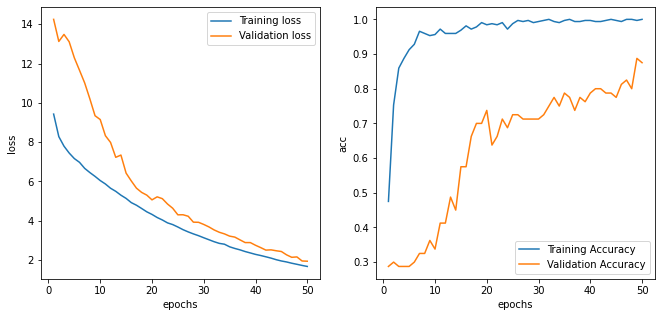

In [104]:
loss_acc_plot(history, 50)

this model seems better than resnet 50 on train and validation and test. in the last 20 iteration train doesn't change but validation gets better

# confusion_matrix

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_predict = model_EfficientNetB3.predict(test_gen)
y_predict = np.argmax(y_predict, axis=1)  #not fuzzy

In [106]:
y_predict

array([3, 0, 4, 1, 3, 0, 0, 1, 2, 0, 4, 1, 1, 3, 0, 1, 1, 4, 2, 4, 4, 2,
       1, 3, 1, 1, 4, 2, 0, 3, 1, 0, 4, 0, 0, 3, 4, 3, 4, 0, 3, 1, 3, 1,
       0, 3, 3, 4, 1, 4, 1, 3, 4, 3, 3, 4, 4, 2, 3, 4, 4, 4, 3, 2, 2, 2,
       0, 4, 0, 1, 4, 1, 3, 4, 4, 0, 0, 2, 3, 2, 0, 0, 4, 3, 3, 1, 4, 1,
       4, 0, 1, 2, 1, 2, 3, 3, 4, 3, 2, 4])

In [107]:
y_test

['Dimnit',
 'Ak',
 'Nazli',
 'Ala_Idris',
 'Dimnit',
 'Dimnit',
 'Ak',
 'Ala_Idris',
 'Buzgulu',
 'Ak',
 'Nazli',
 'Ala_Idris',
 'Nazli',
 'Dimnit',
 'Ak',
 'Ala_Idris',
 'Buzgulu',
 'Nazli',
 'Buzgulu',
 'Nazli',
 'Nazli',
 'Buzgulu',
 'Ala_Idris',
 'Dimnit',
 'Ala_Idris',
 'Ala_Idris',
 'Nazli',
 'Buzgulu',
 'Ak',
 'Dimnit',
 'Ala_Idris',
 'Ak',
 'Nazli',
 'Ak',
 'Nazli',
 'Dimnit',
 'Nazli',
 'Dimnit',
 'Nazli',
 'Ak',
 'Dimnit',
 'Ala_Idris',
 'Dimnit',
 'Ala_Idris',
 'Buzgulu',
 'Dimnit',
 'Dimnit',
 'Nazli',
 'Ala_Idris',
 'Nazli',
 'Ala_Idris',
 'Dimnit',
 'Nazli',
 'Dimnit',
 'Dimnit',
 'Nazli',
 'Nazli',
 'Buzgulu',
 'Dimnit',
 'Nazli',
 'Nazli',
 'Nazli',
 'Dimnit',
 'Buzgulu',
 'Buzgulu',
 'Buzgulu',
 'Ak',
 'Nazli',
 'Dimnit',
 'Ala_Idris',
 'Nazli',
 'Buzgulu',
 'Dimnit',
 'Nazli',
 'Nazli',
 'Ak',
 'Ak',
 'Buzgulu',
 'Dimnit',
 'Buzgulu',
 'Ak',
 'Ak',
 'Nazli',
 'Dimnit',
 'Dimnit',
 'Ala_Idris',
 'Nazli',
 'Ala_Idris',
 'Nazli',
 'Ak',
 'Ala_Idris',
 'Buzgulu',
 'Ala_Id

In [108]:
labels = dict((v,k) for k,v in (train_gen.class_indices).items())
y_predict = np.array([labels[k] for k in y_predict])

              precision    recall  f1-score   support

          Ak       0.78      1.00      0.88        14
   Ala_Idris       0.85      1.00      0.92        17
     Buzgulu       1.00      0.81      0.90        16
      Dimnit       1.00      0.92      0.96        25
       Nazli       1.00      0.93      0.96        28

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.92       100
weighted avg       0.94      0.93      0.93       100



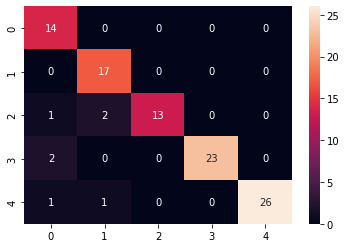

In [109]:
import seaborn as sns
print(classification_report(y_test, y_predict))
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, annot=True)

this model can predict test well!!

### 10 fold cross val

In [126]:
X_train_k_f = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_train_k_f = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)])

new_df = pd.concat([X_train_k_f, y_train_k_f], axis=1)
new_df = new_df.sample(frac=1)
new_df = new_df.set_axis(['image_path', 'label'], axis=1, inplace=False)
X_train_k_f = new_df['image_path']
y_train_k_f = new_df['label']

acc = []
loss = []


model_name='EfficientNetB3'
lr=.001
for i in range(10):
    print(i,'th fold')
    kf_train = pd.concat([pd.concat([X_train_k_f.iloc[0:i*40],X_train_k_f.iloc[i*40+40:]]),
                               pd.concat([y_train_k_f.iloc[0:i*40],y_train_k_f.iloc[i*40+40:]])], axis=1
                              )
    
    kf_valid = pd.concat([X_train_k_f.iloc[i*40:i*40+40],                               
                               y_train_k_f.iloc[i*40:i*40+40]], axis=1
                              )

    train_gen_kf = gen.flow_from_dataframe(
        kf_train,  
        x_col='image_path',
        y_col='label', 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
        )
    val_gen_kf = gen.flow_from_dataframe(
        kf_valid,  
        x_col='image_path',
        y_col='label', 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
        )


    base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=image_size, pooling='max') 
    base_model.trainable=True
    x=base_model.output
    x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x=Dropout(rate=.45, seed=123)(x)       
    output=Dense(len(label_names), activation='softmax')(x)
    model_EfficientNetB3=models.Model(inputs=base_model.input, outputs=output)

    model_EfficientNetB3.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 



    history = model_EfficientNetB3.fit(x=train_gen_kf,  epochs=20, verbose=2,
                validation_steps=None,  shuffle=False,  initial_epoch=0)
    


acc.append(pred[1] * 100)
loss.append(pred[0])

0 th fold
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/20
12/12 - 27s - loss: 9.3590 - accuracy: 0.4639 - 27s/epoch - 2s/step
Epoch 2/20
12/12 - 12s - loss: 8.5027 - accuracy: 0.6583 - 12s/epoch - 1s/step
Epoch 3/20
12/12 - 11s - loss: 7.9323 - accuracy: 0.8000 - 11s/epoch - 957ms/step
Epoch 4/20
12/12 - 12s - loss: 7.5811 - accuracy: 0.8444 - 12s/epoch - 1s/step
Epoch 5/20
12/12 - 12s - loss: 7.2171 - accuracy: 0.8972 - 12s/epoch - 975ms/step
Epoch 6/20
12/12 - 12s - loss: 7.0520 - accuracy: 0.8778 - 12s/epoch - 1s/step
Epoch 7/20
12/12 - 11s - loss: 6.7875 - accuracy: 0.9083 - 11s/epoch - 952ms/step
Epoch 8/20
12/12 - 12s - loss: 6.6488 - accuracy: 0.8944 - 12s/epoch - 1s/step
Epoch 9/20
12/12 - 11s - loss: 6.4413 - accuracy: 0.9194 - 11s/epoch - 948ms/step
Epoch 10/20
12/12 - 14s - loss: 6.2511 - accuracy: 0.9472 - 14s/epoch - 1s/step
Epoch 11/20
12/12 - 12s - loss: 6.0656 - accuracy: 0.9389 - 12s/epoc

In [139]:
import statistics
print("acc : mean", int(statistics.mean(acc)),'min', int(min(acc)),  'max',int(max(acc)))
print("loss: mean", int(statistics.mean(loss)),'min', int(min(loss)),'max',  int(max(loss)))

acc : mean 79 min 65 max 92
loss: mean 4 min 3 max 4


to speed up I decreas number of epoch so it's acc is lower. when there was 60 epoch, acc became 97% 

it took 50 min :)